# 🌵 Vapor Pressure Deficit

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from toolbox.pressure import vapor_pressure_deficit

In [2]:
ds = Herbie("2021-04-23").xarray("(TMP|RH):2 m")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-23 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:722: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(search)


👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\hrrr\20210423]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [3]:
vpd = vapor_pressure_deficit(ds["t2m"] - 273.15, ds["r2"])

crs = ds.herbie.crs

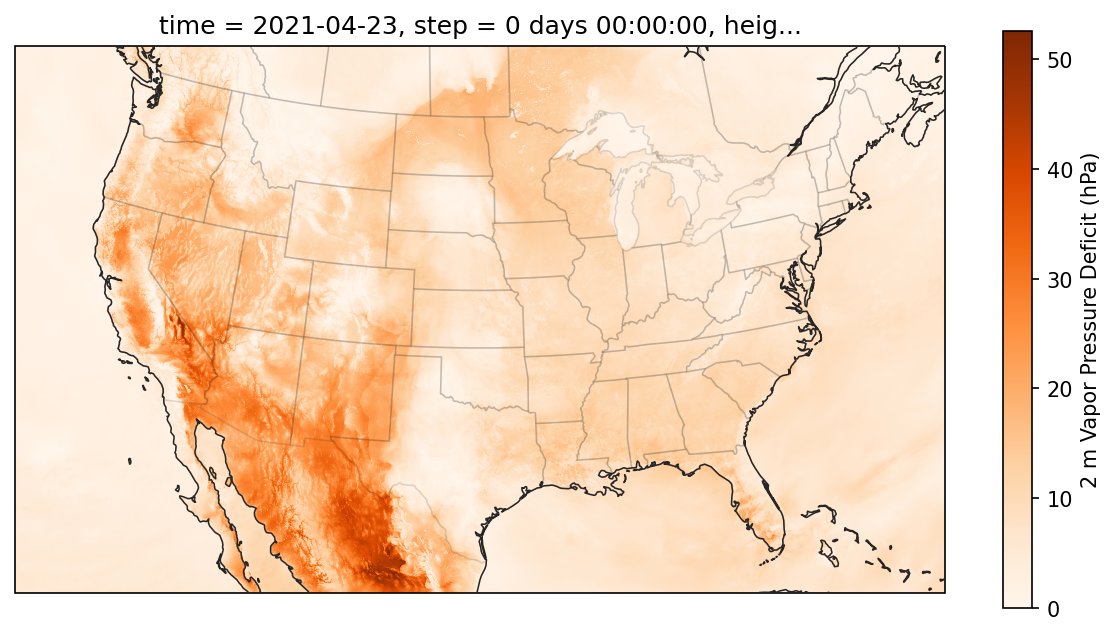

In [5]:
ax = EasyMap("50m", crs=crs, figsize=[10, 5], dpi=150).STATES().ax
vpd.plot.pcolormesh(
    x="longitude",
    y="latitude",
    transform=pc,
    cmap="Oranges",
    ax=ax,
    cbar_kwargs=dict(label="2 m Vapor Pressure Deficit (hPa)"),
)